In [3]:
!pip install scikit-learn-extra

Automatically created module for IPython interactive environment


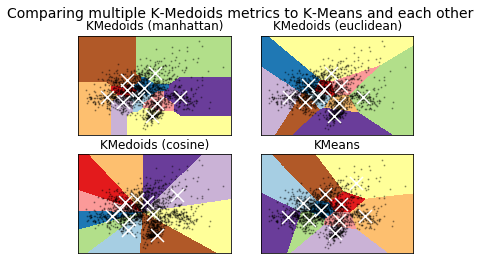

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

print(__doc__)

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
n_digits = len(np.unique(digits.target))

reduced_data = PCA(n_components=2).fit_transform(data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure()
plt.clf()

plt.suptitle(
    "Comparing multiple K-Medoids metrics to K-Means and each other",
    fontsize=14,
)


selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=n_digits),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=n_digits),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=n_digits), "KMedoids (cosine)"),
    (KMeans(n_clusters=n_digits), "KMeans"),
]

plot_rows = int(np.ceil(len(selected_models) / 2.0))
plot_cols = 2

for i, (model, description) in enumerate(selected_models):

    # Obtain labels for each point in mesh. Use last trained model.
    model.fit(reduced_data)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(
        reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2, alpha=0.3
    )
    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

plt.show()

Automatically created module for IPython interactive environment


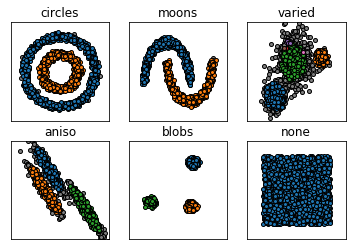

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.cluster import CommonNNClustering
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


print(__doc__)


np.random.seed(42)
n = 2000


# circles
circles, _ = datasets.make_circles(
    n_samples=n, factor=0.5, noise=0.05, random_state=10
)

circles = StandardScaler().fit_transform(circles)


# blobs
blobs, _ = datasets.make_blobs(
    centers=[[-9, -8], [11, -10], [12, 12]], n_samples=n, random_state=10
)

blobs = StandardScaler().fit_transform(blobs)


# moons
moons, _ = datasets.make_moons(n_samples=n, noise=0.05, random_state=10)

moons = StandardScaler().fit_transform(moons)


# no_structure
no_structure = np.random.rand(n, 2)
no_structure = StandardScaler().fit_transform(no_structure)


# aniso
X, y = datasets.make_blobs(n_samples=n, random_state=170)

transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X, transformation)
aniso = StandardScaler().fit_transform(aniso)


# varied
varied, _ = datasets.make_blobs(
    n_samples=n, cluster_std=[1.0, 2, 0.5], random_state=170
)

varied = StandardScaler().fit_transform(varied)


fits = [
    ("circles", circles, {"eps": 0.2, "min_samples": 5}),
    ("moons", moons, {"eps": 0.2, "min_samples": 5}),
    ("varied", varied, {"eps": 0.2, "min_samples": 15}),
    ("aniso", aniso, {"eps": 0.18, "min_samples": 12}),
    ("blobs", blobs, {"eps": 0.2, "min_samples": 5}),
    ("none", no_structure, {"eps": 0.2, "min_samples": 5}),
]

fig, ax = plt.subplots(2, 3)
ax = ax.flatten()
for index, (name, data, params) in enumerate(fits):
    cobj = CommonNNClustering(**params).fit(data)
    labels = cobj.labels_
    ax[index].plot(
        *data[np.where(labels == -1)[0]].T,
        linestyle="",
        color="None",
        marker="o",
        markersize=4,
        markerfacecolor="gray",
        markeredgecolor="k",
    )


    for cluster_number in range(0, int(np.max(labels)) + 1):
        ax[index].plot(
            *data[np.where(labels == cluster_number)[0]].T,
            linestyle="",
            marker="o",
            markersize=4,
            markeredgecolor="k",
        )


    ax[index].set(
        **{
            "xlabel": None,
            "ylabel": None,
            "xlim": (-2.5, 2.5),
            "ylim": (-2.5, 2.5),
            "xticks": (),
            "yticks": (),
            "aspect": "equal",
            "title": name,
        }
    )